In [ ]:
import evaluate
accuracy = evaluate.load('accuracy')
accuracy.description

In [15]:
import evaluate
#由於無法直接載入 accuracy.py，所以使用 evaluate.load() 載入 accuracy 模組
#先至github下載 https://github.com/huggingface/evaluate
#accuracy = evaluate.load("accuracy")
accuracy = evaluate.load("evaluate-main/metrics/accuracy/accuracy.py")
print(accuracy.description)


Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negative



In [16]:
print(accuracy.inputs_description)


Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
        {'accuracy': 0.5}

    Example 2-The same as Example 1, except with `normalize` set to `False`.
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> res

In [17]:
import evaluate
accuracy = evaluate.load("evaluate-main/metrics/accuracy/accuracy.py")
results = accuracy.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
results

{'accuracy': 0.5}

In [19]:
import evaluate
accuracy = evaluate.load("evaluate-main/metrics/accuracy/accuracy.py")
for ref, pred in zip([0, 1, 0, 1], [1, 0, 0, 1]):
    accuracy.add(reference=ref, prediction=pred)
accuracy.compute()

{'accuracy': 0.5}

In [20]:
import evaluate
accuracy = evaluate.load("evaluate-main/metrics/accuracy/accuracy.py")
for refs, preds in zip([[0,1],[0,1]],[[1,0],[0,1]]):
    accuracy.add_batch(references=refs, predictions=preds)
accuracy.compute()

{'accuracy': 0.5}

In [25]:
import evaluate
#clf_metrics = evaluate.combine(['accuracy','f1', 'recall', "precision"])
clf_metrics = evaluate.combine([
    'evaluate-main/metrics/accuracy/accuracy.py',
    'evaluate-main/metrics/f1/f1.py',
    'evaluate-main/metrics/recall/recall.py',
    "evaluate-main/metrics/precision/precision.py"])

clf_metrics.compute(predictions=[0, 1, 0], references=[0, 1, 1])

{'accuracy': 0.6666666666666666,
 'f1': 0.6666666666666666,
 'recall': 0.5,
 'precision': 1.0}

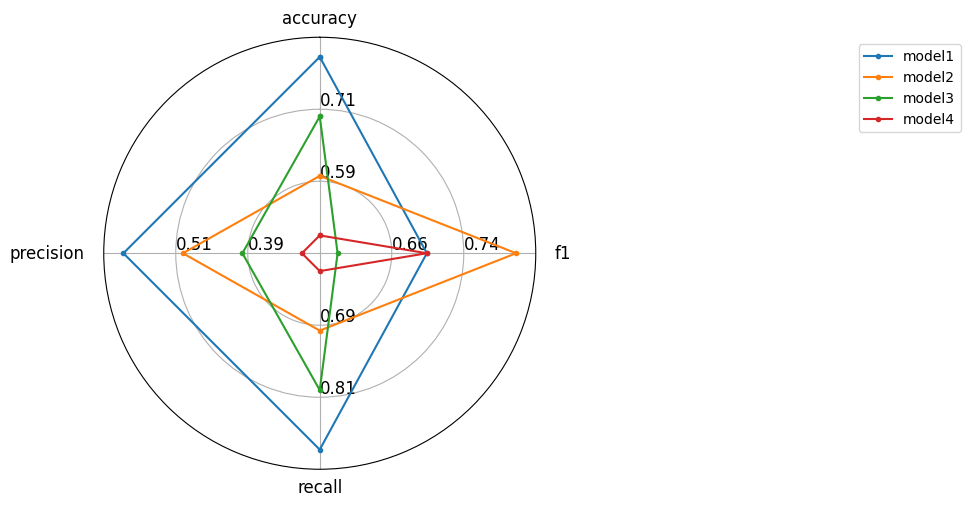

In [27]:
from evaluate.visualization import radar_plot

data = [
    {"accuracy": 0.8, "f1": 0.7, "recall": 0.9, "precision": 0.6},
    {"accuracy": 0.6, "f1": 0.8, "recall": 0.7, "precision": 0.5},
    {"accuracy": 0.7, "f1": 0.6, "recall": 0.8, "precision": 0.4},
    {"accuracy": 0.5, "f1": 0.7, "recall": 0.6, "precision": 0.3},
]
model_names = ["model1", "model2", "model3", "model4"]

plot = radar_plot(data, model_names=model_names)